In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot

### Verinin okunması ve boş değerlerin handle edilmesi

In [2]:
data = pd.read_csv("datasets/data_with_nans.csv")

In [3]:
data.head()

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,4,5.0,3.4,1.5,0.2,Iris-setosa


In [4]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,170.000000,167.000000,169.000000,166.000000,168.000000
mean,84.500000,5.826347,3.072781,3.707229,1.180357
std,49.218899,0.827189,0.447578,1.789382,0.765049
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,42.250000,5.100000,2.800000,1.500000,0.300000
50%,84.500000,5.800000,3.000000,4.300000,1.300000
75%,126.750000,6.400000,3.400000,5.100000,1.800000
max,169.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data.groupby(by='Species').aggregate(['min','max','std','mean'])

Id                        SepalLengthCm                 \
                 min  max        std   mean           min  max       std   
Species                                                                    
Iris-setosa        0   59  17.464249   29.5           4.3  6.9  0.429014   
Iris-versicolor   60  113  15.732133   86.5           4.9  7.0  0.516189   
Iris-virginica   114  169  16.309506  141.5           4.9  7.9  0.650025   

                          SepalWidthCm                          PetalLengthCm  \
                     mean          min  max       std      mean           min   
Species                                                                         
Iris-setosa      5.034483          2.3  4.4  0.390709  3.389831           1.0   
Iris-versicolor  5.932075          2.0  4.4  0.382355  2.805556           1.5   
Iris-virginica   6.546429          2.2  3.9  0.355203  2.996429           1.3   

                                         PetalWidthCm                           
                 max       std      mean          min  max       std      mean  
Species                                                                         
Iris-setosa      5.4  0.639570  1.572414          0.1  2.1  0.295950  0.300000  
Iris-versicolor  5.1  0.623167  4.190385          0.4  1.8  0.235049  1.314815  
Iris-virginica   6.9  0.795195  5.469643          0.4  2.5  0.353215  1.992727

In [7]:
data.isnull().sum()

Id               0
SepalLengthCm    3
SepalWidthCm     1
PetalLengthCm    4
PetalWidthCm     2
Species          0
dtype: int64

In [8]:
for column in data.columns[1:-1]:
    data[column].fillna(value=data[column].mean(),inplace=True)

In [9]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Verinin Görselleştirilmesi

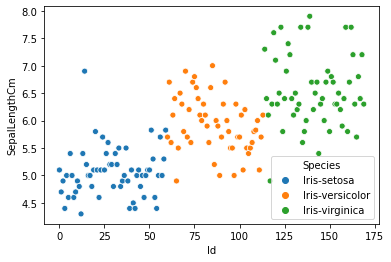

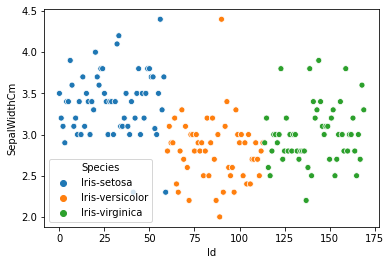

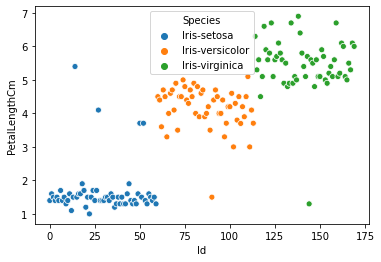

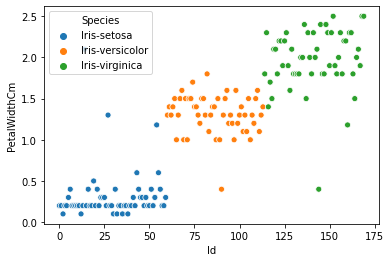

In [10]:
for column in data.columns[1:-1]:
    sns.scatterplot(data=data,x='Id',y=column,hue='Species')
    plot.show()

### Outlier Detection

#### 3 Standar Sapma

In [11]:
selected_spec = data[data['Species'] == "Iris-setosa"]
selected_column = selected_spec["SepalLengthCm"]

In [12]:
std = selected_column.std()
avg = selected_column.mean()

In [13]:
avg

5.060878243512974

In [14]:
three_sigma_plus = (avg + 3*std)
three_sigma_minus = (avg - 3*std)

In [15]:
three_sigma_plus

6.397012123414941

In [16]:
selected_column[((selected_spec['SepalLengthCm'] > three_sigma_plus) | (selected_spec['SepalLengthCm'] < three_sigma_minus))].index

Int64Index([14], dtype='int64')

In [17]:
# loop

for column in data.columns[1:-1]:
    for spec in data["Species"].unique():
        selected_spec = data[data["Species"] == spec]
        selected_column = selected_spec[column]
        
        std = selected_column.std()
        avg = selected_column.mean()
        
        three_sigma_plus = avg + (3*std)
        three_sigma_minus = avg - (3*std)
        
        outliers = selected_column[((selected_spec[column] > three_sigma_plus) | (selected_spec[column] < three_sigma_minus))].index
        data.drop(index = outliers,inplace=True)

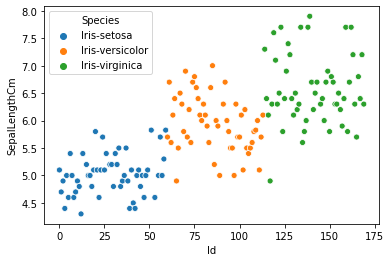

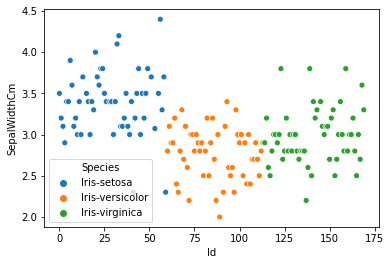

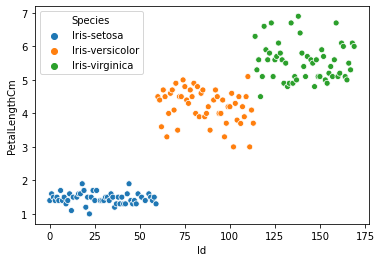

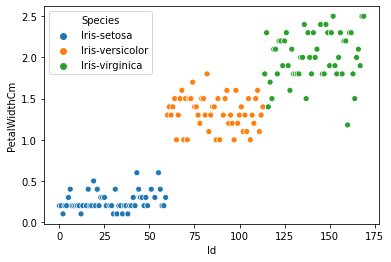

In [18]:
for column in data.columns[1:-1]:
    sns.scatterplot(data=data,x='Id',y=column,hue='Species')
    plot.show()

## IQR - Quantile

In [19]:
for column in data.columns[1:-1]:
    for spec in data['Species'].unique():
        selected_spec = data[data['Species'] == spec]
        selected_column = selected_spec[column]
        
        q1 = selected_column.quantile(0.25)
        q3 = selected_column.quantile(0.75)
        IQR = q3-q1
        minimum = q1 - (1.5*IQR)
        maximum = q3 + (1.5*IQR)
        
        max_idxs = data[(data['Species'] == spec) & (data[column] > maximum)].index
        min_idxs = data[(data['Species'] == spec) & (data[column] < minimum)].index
        data.drop(index = max_idxs,inplace=True)
        data.drop(index = min_idxs,inplace=True)

In [20]:
from sklearn.preprocessing import LabelEncoder

### Label Encoding

In [21]:
le = LabelEncoder()

In [22]:
data['Species']=le.fit_transform(data['Species'])

In [23]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
165,165,5.7,2.5,5.0,2.0,2
166,166,6.8,3.0,5.5,2.1,2
167,167,6.4,2.7,5.3,1.9,2
168,168,7.2,3.6,6.1,2.5,2
169,169,6.3,3.3,6.0,2.5,2


In [24]:
data.drop('Id',axis=1,inplace=True)

### Veri Kontrolleri

In [25]:
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [26]:
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.2)

In [29]:
y_test.value_counts()

2    11
1    11
0     9
Name: Species, dtype: int64

In [30]:
y_train.value_counts()

2    43
1    42
0    38
Name: Species, dtype: int64

## Modelin oluşturulması

In [31]:
import xgboost as xgb

In [32]:
xgb_cls = xgb.XGBClassifier(objective='multiclass:softmax', num_class=3)

In [33]:
xgb_cls.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_class=3, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
preds = xgb_cls.predict(X_test)

In [35]:
preds

array([2, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 2, 1, 2,
       2, 1, 2, 0, 0, 2, 1, 1, 2])

In [36]:
import numpy as np
len(np.array(y_test))

31

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [38]:
accuracy_score(y_test,preds)

0.967741935483871

In [39]:
confusion_matrix(y_test,preds)

array([[ 9,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 10]], dtype=int64)